In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('../Data/cleaned_data.csv')
rows_dropped_df = pd.read_csv('../Data/rows_dropped_df.csv')

/var/folders/6_/32r78n_d53x2nss5m1qjc1pc0000gn/T/ipykernel_81810/109991724.py:1: DtypeWarning: Columns (48,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/cleaned_data.csv')


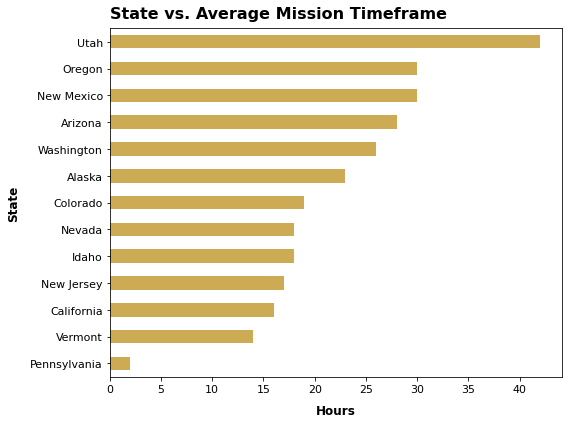

In [7]:
fig, ax = plt.subplots(figsize=(8,6))

df.groupby('state')['total_hours'].median().to_frame().sort_values(by='total_hours').plot(kind='barh',
                                              fontsize=11,
                                              color='darkgoldenrod',
                                              alpha=0.7,
                                              ax=ax)
ax.get_legend().remove()

ax.set_title('State vs. Average Mission Timeframe',
             fontsize=16, 
             fontweight='bold', 
             color='black', 
             loc='left', 
             pad=10)
ax.set_ylabel('State', weight='bold', fontsize=12, labelpad=10)
ax.set_xlabel('Hours', weight='bold', fontsize=12, labelpad=10)

plt.tight_layout();  

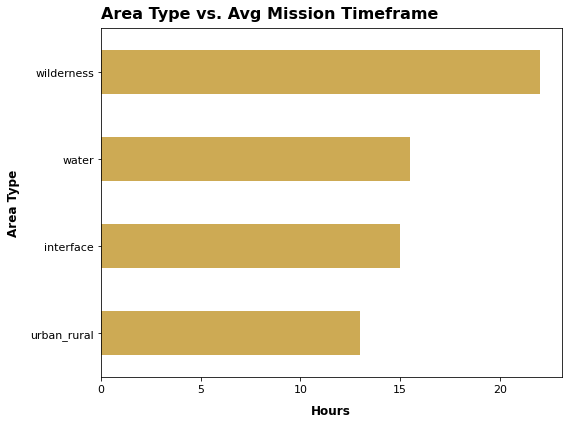

In [8]:
area_type_df = df.groupby('area_type')['total_hours'].median()\
                    .to_frame().sort_values(by='total_hours')
area_type_df.reset_index(inplace=True)
area_type_df.drop(index=3, inplace=True)
area_type_df.set_index('area_type', inplace=True)

fig, ax = plt.subplots(figsize=(8,6))

area_type_df.plot(kind='barh',
                                              fontsize=11,
                                              color='darkgoldenrod',
                                              alpha=0.7,
                                              ax=ax)
ax.get_legend().remove()

ax.set_title('Area Type vs. Avg Mission Timeframe',
             fontsize=16, 
             fontweight='bold', 
             color='black', 
             loc='left', 
             pad=10)
ax.set_ylabel('Area Type', weight='bold', fontsize=12, labelpad=10)
ax.set_xlabel('Hours', weight='bold', fontsize=12, labelpad=10)

plt.tight_layout();  

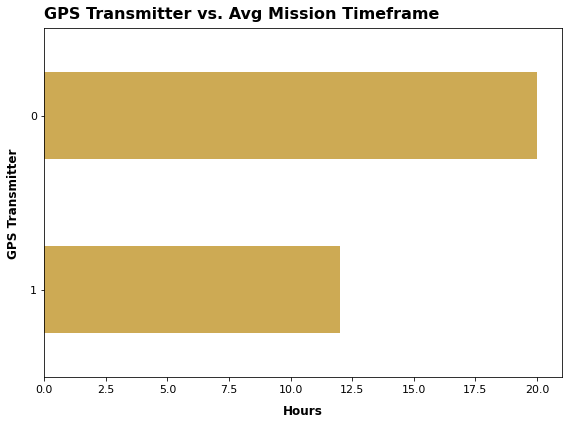

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

df.groupby('gps')['total_hours'].median().to_frame().sort_values(by='total_hours').plot(kind='barh',
                                              fontsize=11,
                                              color='darkgoldenrod',
                                              alpha=0.7,
                                              ax=ax)
ax.get_legend().remove()

ax.set_title('GPS Transmitter vs. Avg Mission Timeframe',
             fontsize=16, 
             fontweight='bold', 
             color='black', 
             loc='left', 
             pad=10)
ax.set_ylabel('GPS Transmitter', weight='bold', fontsize=12, labelpad=10)
ax.set_xlabel('Hours', weight='bold', fontsize=12, labelpad=10)

plt.tight_layout();  

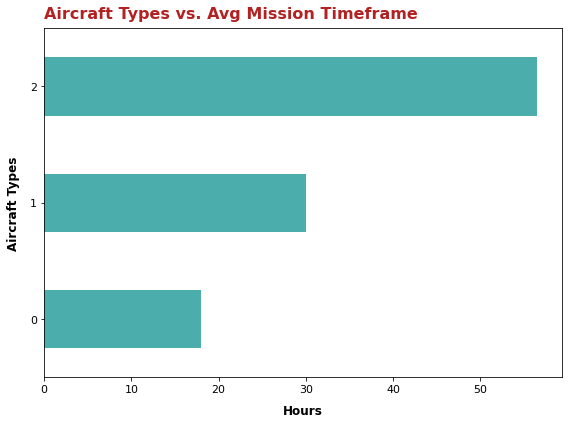

In [10]:
fig, ax = plt.subplots(figsize=(8,6))

df.groupby('total_aircrafts')['total_hours'].median().to_frame().sort_values(by='total_hours').plot(kind='barh',
                                              fontsize=11,
                                              color='darkcyan',
                                              alpha=0.7,
                                              ax=ax)
ax.get_legend().remove()

ax.set_title('Aircraft Types vs. Avg Mission Timeframe',
             fontsize=16, 
             fontweight='bold', 
             color='firebrick', 
             loc='left', 
             pad=10)
ax.set_ylabel('Aircraft Types', weight='bold', fontsize=12, labelpad=10)
ax.set_xlabel('Hours', weight='bold', fontsize=12, labelpad=10)

plt.tight_layout();  

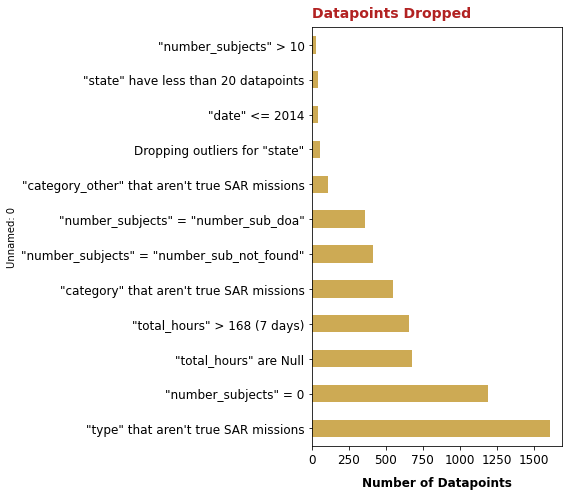

In [16]:
rows_dropped_df.set_index('Unnamed: 0', inplace=True)

fig, ax = plt.subplots(figsize=(8,7))

rows_dropped_df.sort_values(by='num_dropped', ascending=False).head(12).plot(kind='barh',
                      fontsize=12,
                      color='darkgoldenrod',
                      alpha=0.7,
                      ax=ax)

ax.set_title('Datapoints Dropped',
             fontsize=14, 
             fontweight='bold', 
             color='firebrick', 
             loc='left', 
             pad=10)
ax.set_xlabel('Number of Datapoints', weight='bold', fontsize=12, labelpad=10)

ax.get_legend().remove()

plt.tight_layout(); 

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

df['time_bin'].value_counts(normalize=True).sort_index().plot(kind='bar', 
                                                              ax=ax, 
                                                             color='darkgoldenrod')

ax.set_title('Distribution of Target',
             fontsize=15, 
             fontweight='bold', 
             color='firebrick', 
             loc='left', 
             pad=10)

ax.set_ylabel('Proportion', weight='bold', labelpad=10, fontsize=12)
ax.set_xlabel('Timeframe Classes', weight='bold', labelpad=10, fontsize=12)
plt.xticks(rotation=0)
plt.ylim([0,1])

plt.tight_layout()

In [ ]:
eng_feats = pd.DataFrame({'feat': ['Children', 
                                   'Seniors', 
                                   'Mental', 
                                   'Winter', 
                                   'Total Aircrafts'],
                          '0': [df.groupby('children')['total_hours'].mean().values[0], 
                                df.groupby('seniors')['total_hours'].mean().values[0], 
                                df.groupby('mental')['total_hours'].mean().values[0],
                                df.groupby('winter')['total_hours'].mean().values[0],
                                df.groupby('total_aircrafts')['total_hours'].mean().values[0]], 
                          '1': [df.groupby('children')['total_hours'].mean().values[1], 
                                df.groupby('seniors')['total_hours'].mean().values[1],
                                df.groupby('mental')['total_hours'].mean().values[1],
                                df.groupby('winter')['total_hours'].mean().values[1],
                                df.groupby('total_aircrafts')['total_hours'].mean().values[1]]})

eng_feats


fig, ax = plt.subplots(figsize=(4, 4))

eng_feats.plot(x='feat', y=['0', '1'], 
               kind='barh', 
               figsize=(10,8), 
               ax=ax, 
               color=['darkgoldenrod', 'darkcyan'], 
               alpha=0.7, 
              fontsize=12)

ax.set_title('Engineered Features One-Hot-Encoded Avg. Total Hours',
             fontsize=16, 
             fontweight='bold', 
             color='black', 
             loc='left', 
             pad=10)

ax.set_ylabel('Features', weight='bold', fontsize=14)
ax.set_xlabel('Avg. Total Hours per OHE Feature', weight='bold', labelpad=10, fontsize=14)

plt.tight_layout()